# Neural Network  Assignment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import adam_v2
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold

## Q 1. Forest Fires Dataset 

In [2]:
f = pd.read_csv('forestfires.csv')
f

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [3]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
f.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
f.shape

(517, 31)

In [6]:
f1 = f.iloc[:,0:11]
forest = pd.concat([f1,f['size_category']],axis=1)
forest

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

    size_category  
0           small  
1           small  
2           small  
3           small  
4           small  
..            ...  
512         large  
513         large  
514         large  
515         small  
516         small  

[517 rows x 12 columns]

<AxesSubplot:xlabel='month', ylabel='count'>

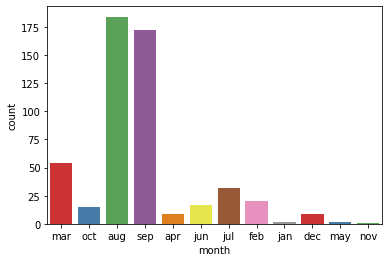

In [7]:
sns.countplot(f1['month'], palette="Set1")

<AxesSubplot:xlabel='DMC', ylabel='DC'>

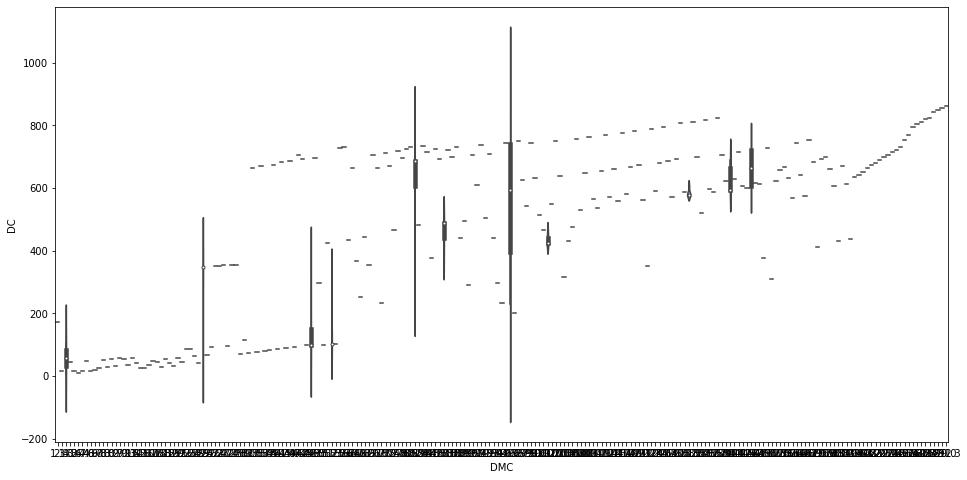

In [8]:
plt.figure(figsize = (16, 8));
sns.violinplot(x = 'DMC', y = 'DC', data = f1)

In [9]:
#Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
forest['month']= label_encoder.fit_transform(forest['month']) 
forest['day']= label_encoder.fit_transform(forest['day'])
forest['size_category']= label_encoder.fit_transform(forest['size_category'])

In [10]:
forest.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0      7    0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1     10    5  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2     10    2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3      7    0  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4      7    3  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

   size_category  
0              1  
1              1  
2              1  
3              1  
4              1

In [11]:
x=forest.iloc[:,0:11]
y=forest.iloc[:,-1]
x.head(7)

month  day  FFMC   DMC     DC   ISI  temp  RH  wind  rain  area
0      7    0  86.2  26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
1     10    5  90.6  35.4  669.1   6.7  18.0  33   0.9   0.0   0.0
2     10    2  90.6  43.7  686.9   6.7  14.6  33   1.3   0.0   0.0
3      7    0  91.7  33.3   77.5   9.0   8.3  97   4.0   0.2   0.0
4      7    3  89.3  51.3  102.2   9.6  11.4  99   1.8   0.0   0.0
5      1    3  92.3  85.3  488.0  14.7  22.2  29   5.4   0.0   0.0
6      1    1  92.3  88.9  495.6   8.5  24.1  27   3.1   0.0   0.0

In [12]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

### Visualization

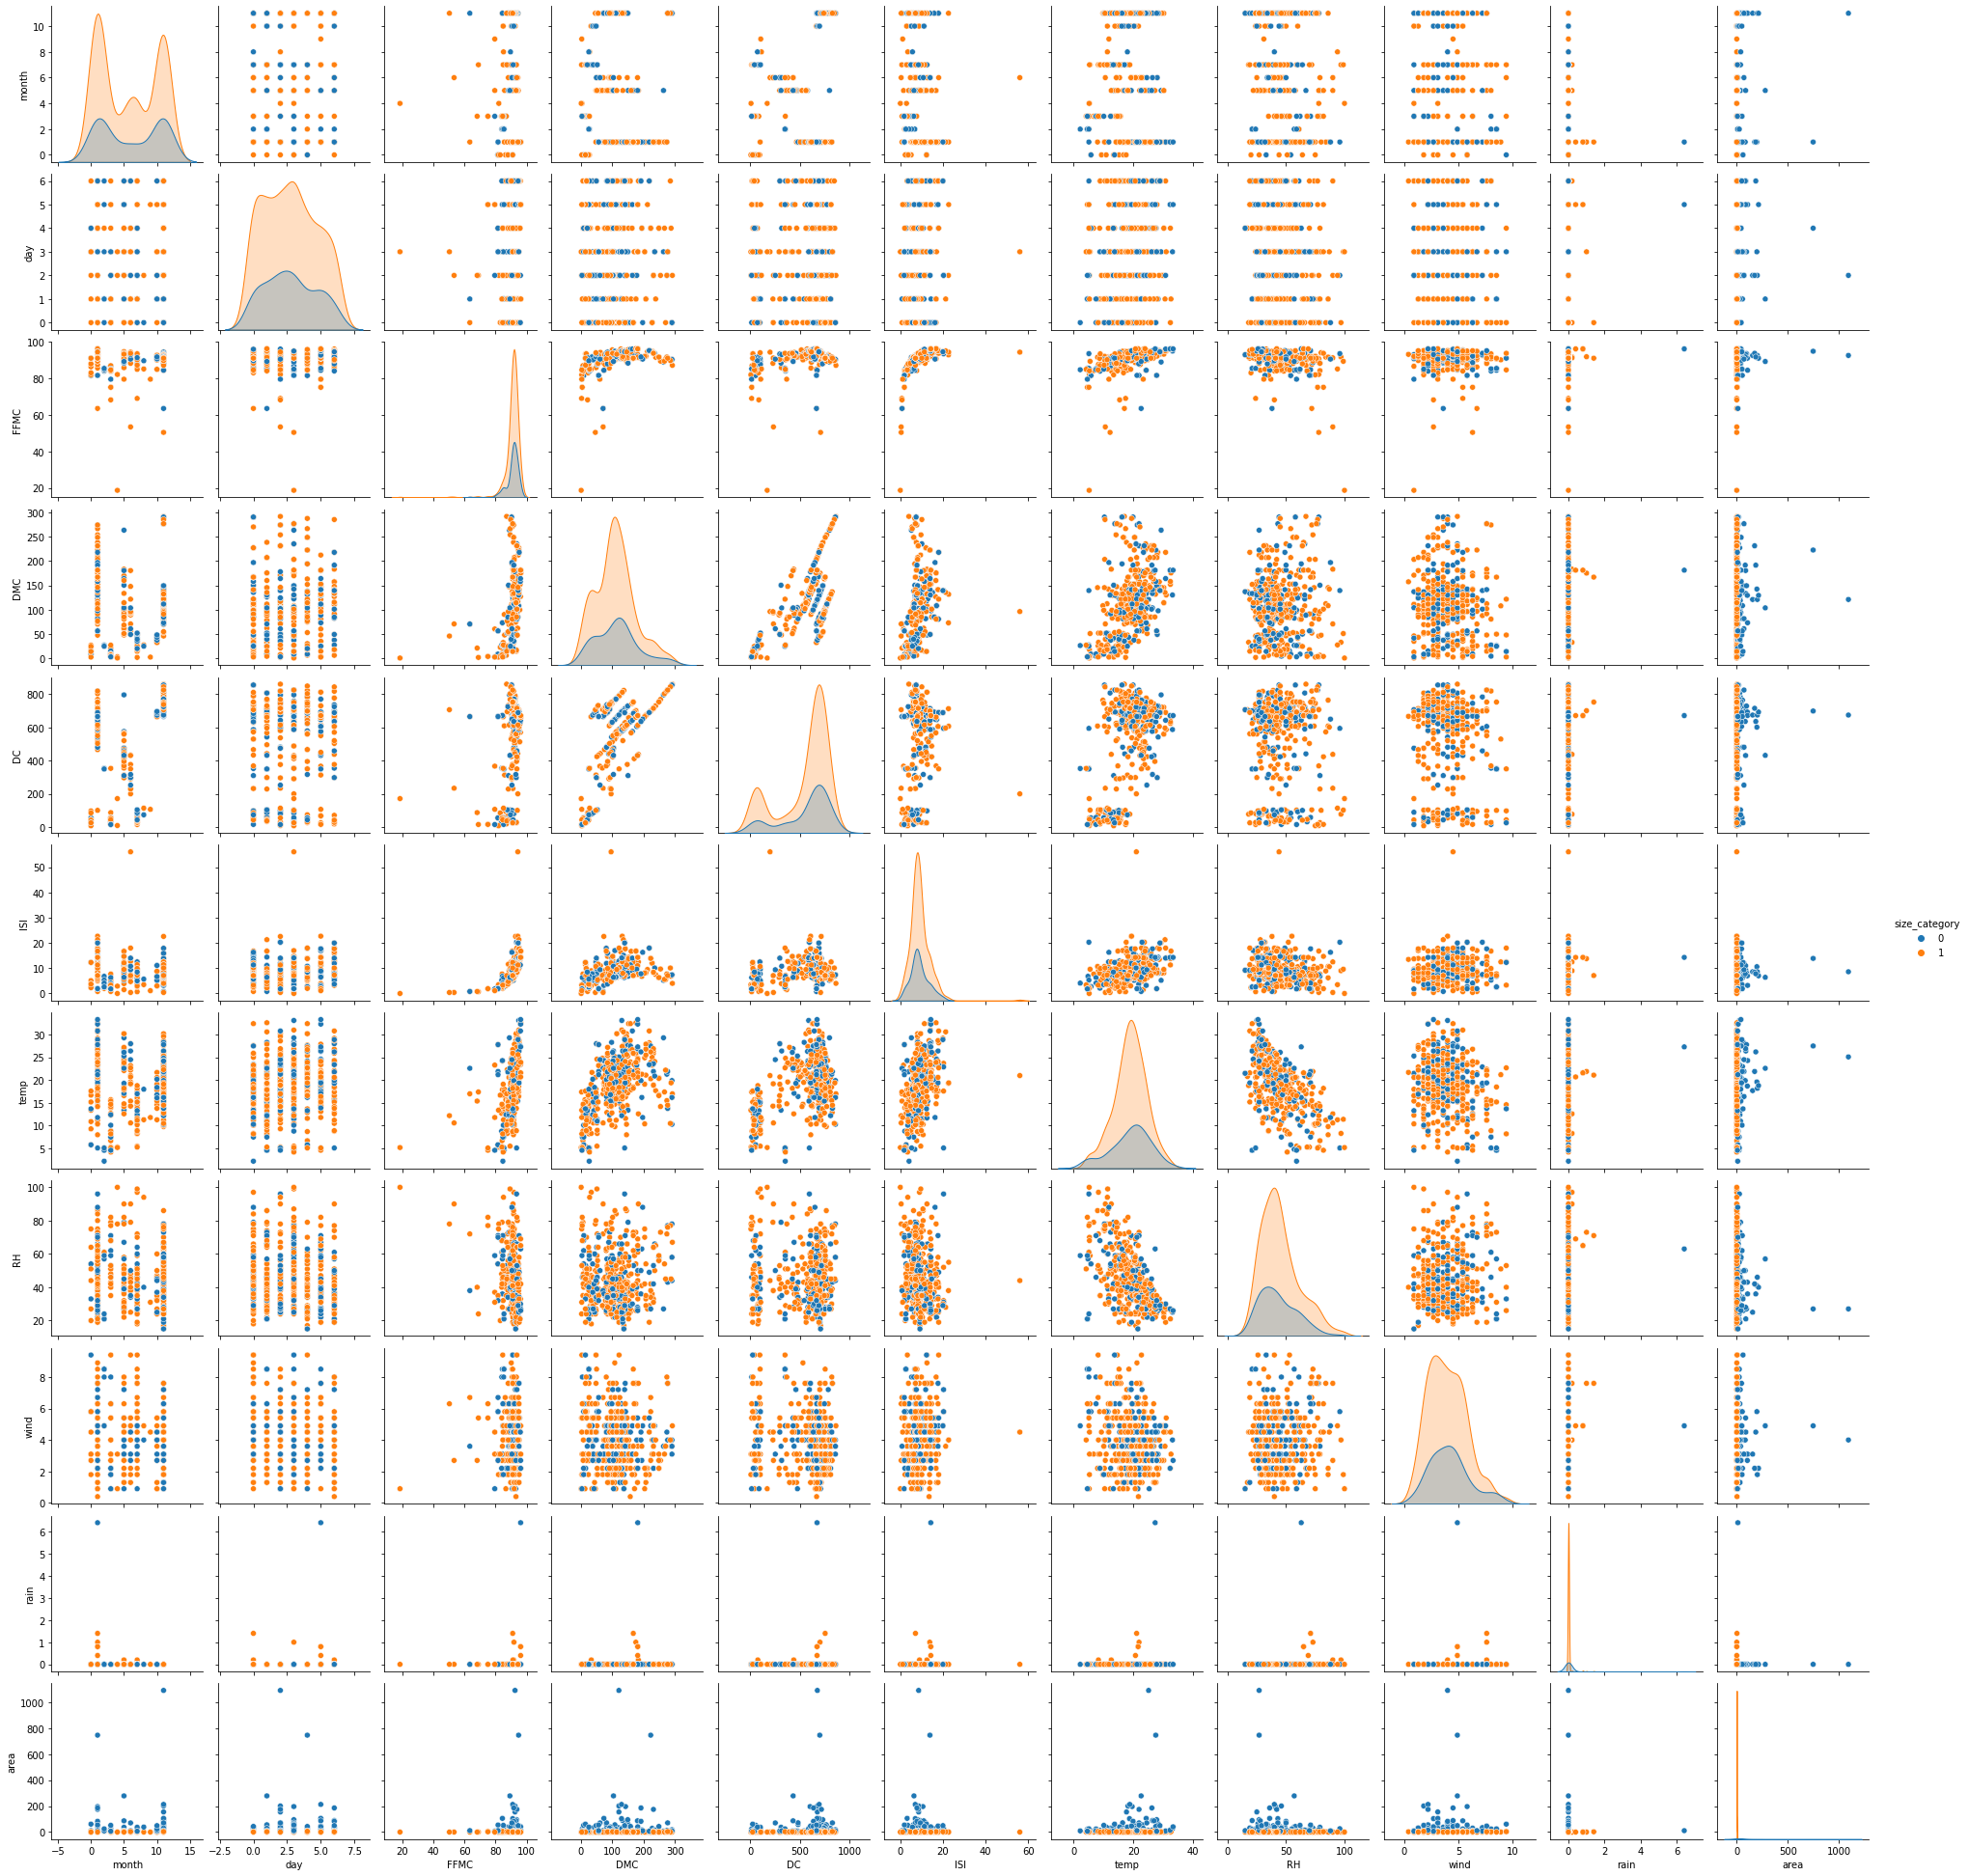

In [13]:
sns.pairplot(forest, hue='size_category')

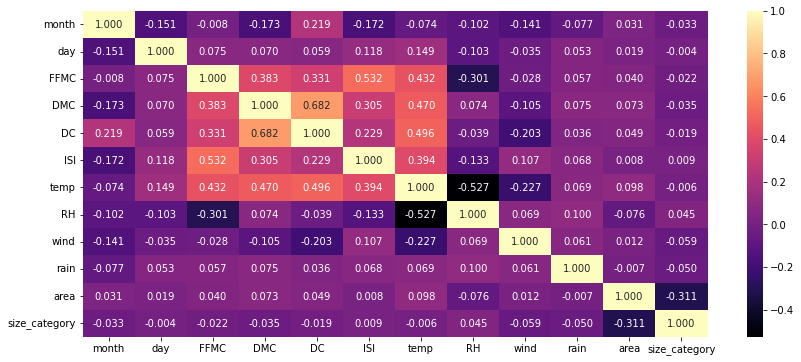

In [14]:
plt.figure(figsize = (14, 6));
sns.heatmap(forest.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

## Neural Network

In [15]:
np.random.seed(7)

# split into input (X) and output (Y) variables
X = forest.iloc[:,0:11]
Y = forest.iloc[:,-1]

In [16]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

### 1. Batch Size and Epochs

In [17]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=11,  activation='relu')) #1st layer
model.add(Dense(11,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [18]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 1s 8ms/step - loss: 1.7972 - accuracy: 0.5347 - val_loss: 1.3827 - val_accuracy: 0.4035
Epoch 2/250
35/35 [==============================] - 0s 3ms/step - loss: 1.0811 - accuracy: 0.5896 - val_loss: 1.0986 - val_accuracy: 0.4912
Epoch 3/250
35/35 [==============================] - 0s 3ms/step - loss: 0.8900 - accuracy: 0.6705 - val_loss: 1.0092 - val_accuracy: 0.4620
Epoch 4/250
35/35 [==============================] - 0s 3ms/step - loss: 0.7851 - accuracy: 0.7168 - val_loss: 0.8670 - val_accuracy: 0.5497
Epoch 5/250
35/35 [==============================] - 0s 3ms/step - loss: 0.7280 - accuracy: 0.6994 - val_loss: 0.7825 - val_accuracy: 0.6959
Epoch 6/250
35/35 [==============================] - 0s 3ms/step - loss: 0.6380 - accuracy: 0.7775 - val_loss: 0.7481 - val_accuracy: 0.6140
Epoch 7/250
35/35 [==============================] - 0s 3ms/step - loss: 0.6152 - accuracy: 0.7717 - val_loss: 0.6860 - val_accuracy: 0.6959
Epoch 8/250
3

Epoch 59/250
35/35 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9595 - val_loss: 0.2477 - val_accuracy: 0.8830
Epoch 60/250
35/35 [==============================] - 0s 3ms/step - loss: 0.1846 - accuracy: 0.9509 - val_loss: 0.2336 - val_accuracy: 0.9064
Epoch 61/250
35/35 [==============================] - 0s 3ms/step - loss: 0.1724 - accuracy: 0.9624 - val_loss: 0.2794 - val_accuracy: 0.9298
Epoch 62/250
35/35 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9335 - val_loss: 0.2249 - val_accuracy: 0.9415
Epoch 63/250
35/35 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9653 - val_loss: 0.2270 - val_accuracy: 0.9064
Epoch 64/250
35/35 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9624 - val_loss: 0.2152 - val_accuracy: 0.9532
Epoch 65/250
35/35 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9653 - val_loss: 0.2073 - val_accuracy: 0.9532
Epoch 

35/35 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9884 - val_loss: 0.0999 - val_accuracy: 0.9532
Epoch 174/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9884 - val_loss: 0.1047 - val_accuracy: 0.9415
Epoch 175/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9855 - val_loss: 0.1424 - val_accuracy: 0.9298
Epoch 176/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9913 - val_loss: 0.1092 - val_accuracy: 0.9474
Epoch 177/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9884 - val_loss: 0.0935 - val_accuracy: 0.9532
Epoch 178/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9971 - val_loss: 0.0992 - val_accuracy: 0.9532
Epoch 179/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9942 - val_loss: 0.1283 - val_accuracy: 0.9415
Epoch 180/250

In [20]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9845
accuracy: 98.45%


In [21]:
model.metrics_names

['loss', 'accuracy']

In [22]:
scores

[0.03863975778222084, 0.9845260977745056]

In [23]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

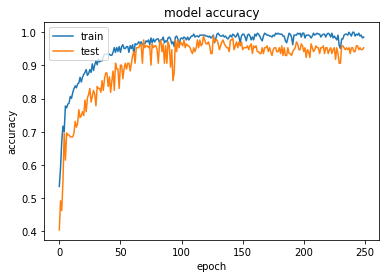

In [24]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

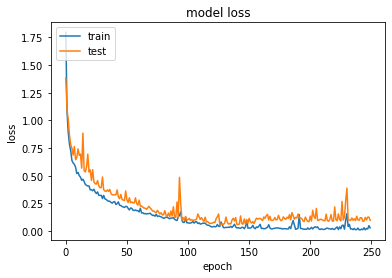

In [25]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Neural Network Hyper Parameter :

In [26]:
# Standardization

a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [27]:
pd.DataFrame(X_standardized).describe()

0             1             2             3             4   \
count  517.000000  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02   
mean     0.000000  5.153840e-17 -1.752306e-15 -2.748715e-17  6.871787e-17   
std      1.000969  1.000969e+00  1.000969e+00  1.000969e+00  1.000969e+00   
min     -1.317959 -1.423121e+00 -1.304582e+01 -1.715608e+00 -2.179108e+00   
25%     -1.089076 -9.031536e-01 -8.063453e-02 -6.606652e-01 -4.448281e-01   
50%      0.055339  1.367805e-01  1.732292e-01 -4.020255e-02  4.691190e-01   
75%      1.199754  6.567476e-01  4.089598e-01  4.927389e-01  6.696628e-01   
max      1.199754  1.696682e+00  1.007353e+00  2.819865e+00  1.261610e+00   

                 5             6             7             8             9   \
count  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02  5.170000e+02   
mean   1.030768e-17  2.542561e-16  2.198972e-16 -4.191790e-16 -6.871787e-18   
std    1.000969e+00  1.000969e+00  1.000969e+00  1.000969e+00  1.000969e+00   
min   -1.980578e+00 -2.876943e+00 -1.796637e+00 -2.021098e+00 -7.326831e-02   
25%   -5.535954e-01 -5.842379e-01 -6.924563e-01 -7.361236e-01 -7.326831e-02   
50%   -1.364774e-01  7.082076e-02 -1.403660e-01 -9.833712e-03 -7.326831e-02   
75%    3.904086e-01  6.741643e-01  5.344111e-01  4.929823e-01 -7.326831e-02   
max    1.033538e+01  2.484195e+00  3.417549e+00  3.007063e+00  2.157228e+01   

                 10  
count  5.170000e+02  
mean   4.123072e-17  
std    1.000969e+00  
min   -2.020198e-01  
25%   -2.020198e-01  
50%   -1.938429e-01  
75%   -9.870852e-02  
max    1.695111e+01

##### Create model using function:

In [28]:
def create_model():
    model = Sequential()
    model.add(Dense(15, input_dim=11, init='uniform', activation='relu'))
    model.add(Dense(11, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

##### Create the model:

In [29]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

#### Tuning of Hyperparameters using different techniques
    1. Batch Size and Epochs
    2. Learning rate and Drop out rate
    3. Activation Function and Kernel Initializer
    4. Number of Neurons in Activation layer
    5. Training model with optimum values of Hyperparameters    

### 2. Learning rate and Drop out rate

In [30]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate, dropout_rate):
    model = Sequential()
    model.add(Dense(11,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(14,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = learning_rate)

    model.compile(loss = 'binary_crossentropy',
                  optimizer = adam,
                  metrics = ['accuracy'])
    
    return model


In [31]:
# Create the model

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)


In [32]:
# Define the grid search parameters

learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,
                   dropout_rate = dropout_rate)


In [33]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   1.2s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.817 total time=   1.2s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.786 total time=   1.4s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.864 total time=   1.2s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.864 total time=   1.2s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   1.3s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.971 total time=   1.3s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.990 total time=   1.4s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.971 total time=   1.5s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.903 total time=   1.4s


In [34]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9708924651145935, using {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8663741707801819,0.07303225708568517 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9670089602470398,0.024270394127656955 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9670649647712708,0.020892992307470545 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8547610163688659,0.0827933416497224 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9670276403427124,0.025052476683126886 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9650672197341919,0.027886260002820462 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.8412061333656311,0.08019700076815711 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9708924651145935,0.027473689864269193 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9670462965965271,0.03397329648216886 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


Inference: The best score is 97.28 % , using 'dropout_rate': 0.2 as 'learning_rate': 0.1

#### 3. Activation Function and Kernel Initializer

In [35]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(11,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(14,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


In [36]:
# Create the model

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)


In [37]:
# Define the grid search parameters
activation_function = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,
                   init = init)


In [38]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.5s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   1.5s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   1.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   1.6s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   1.4s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.903 total time=   1.2s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.903 total time=   1.3s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.893 total time=   1.3s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   1.2s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.885 total time=   1.3s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.874 total time=   1.3s
[CV 4/5; 11/12] START activation_f

In [39]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9224981307983399, using {'activation_function': 'linear', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.866374158859253,0.06877826641551273 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8334764838218689,0.08940635235406569 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.9205750465393067,0.041750114411771615 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9089805841445923,0.04642208287777203 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9224981307983399,0.039277318076885955 with: {'activ

Inference: The best score is 92.25 % , using 'activation_function': 'tanh' as 'init': 'uniform'

### 4. Number of Neurons in activation layer

In [40]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',
                  optimizer = adam,
                  metrics = ['accuracy'])
    return model


In [41]:
# Create the model

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)


In [42]:
# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,
                   neuron2 = neuron2)


In [43]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   1.3s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.750 total time=   1.2s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.660 total time=   1.3s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.748 total time=   1.2s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.796 total time=   1.2s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [44]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9070201516151428, using {'neuron1': 16, 'neuron2': 8}
0.7907767057418823,0.11347600277863003 with: {'neuron1': 4, 'neuron2': 2}
0.8140776634216309,0.09780800617496571 with: {'neuron1': 4, 'neuron2': 4}
0.8412247896194458,0.08143020179465758 with: {'neuron1': 4, 'neuron2': 8}
0.8315533876419068,0.08801815959665003 with: {'neuron1': 8, 'neuron2': 2}
0.8431852102279663,0.08222280711050739 with: {'neuron1': 8, 'neuron2': 4}
0.8722554326057435,0.06962087796222331 with: {'neuron1': 8, 'neuron2': 8}
0.8528752803802491,0.0789674442810762 with: {'neuron1': 16, 'neuron2': 2}
0.8761202454566955,0.06719695851835611 with: {'neuron1': 16, 'neuron2': 4}
0.9070201516151428,0.04689568298068453 with: {'neuron1': 16, 'neuron2': 8}


Inference: The best score is 91.28 % , using 'neuron1': 16 and 'neuron2': 8

## Q 2. Gas Turbine Dataset

In [45]:
turbine1 = pd.read_csv('gas_turbines.csv')
turbine1

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [46]:
turbine = turbine1.drop_duplicates()    #cleaning duplicates
turbine.shape

(15039, 11)

In [47]:
turbine.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [48]:
turbine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


In [49]:
turbine.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

### Visualization

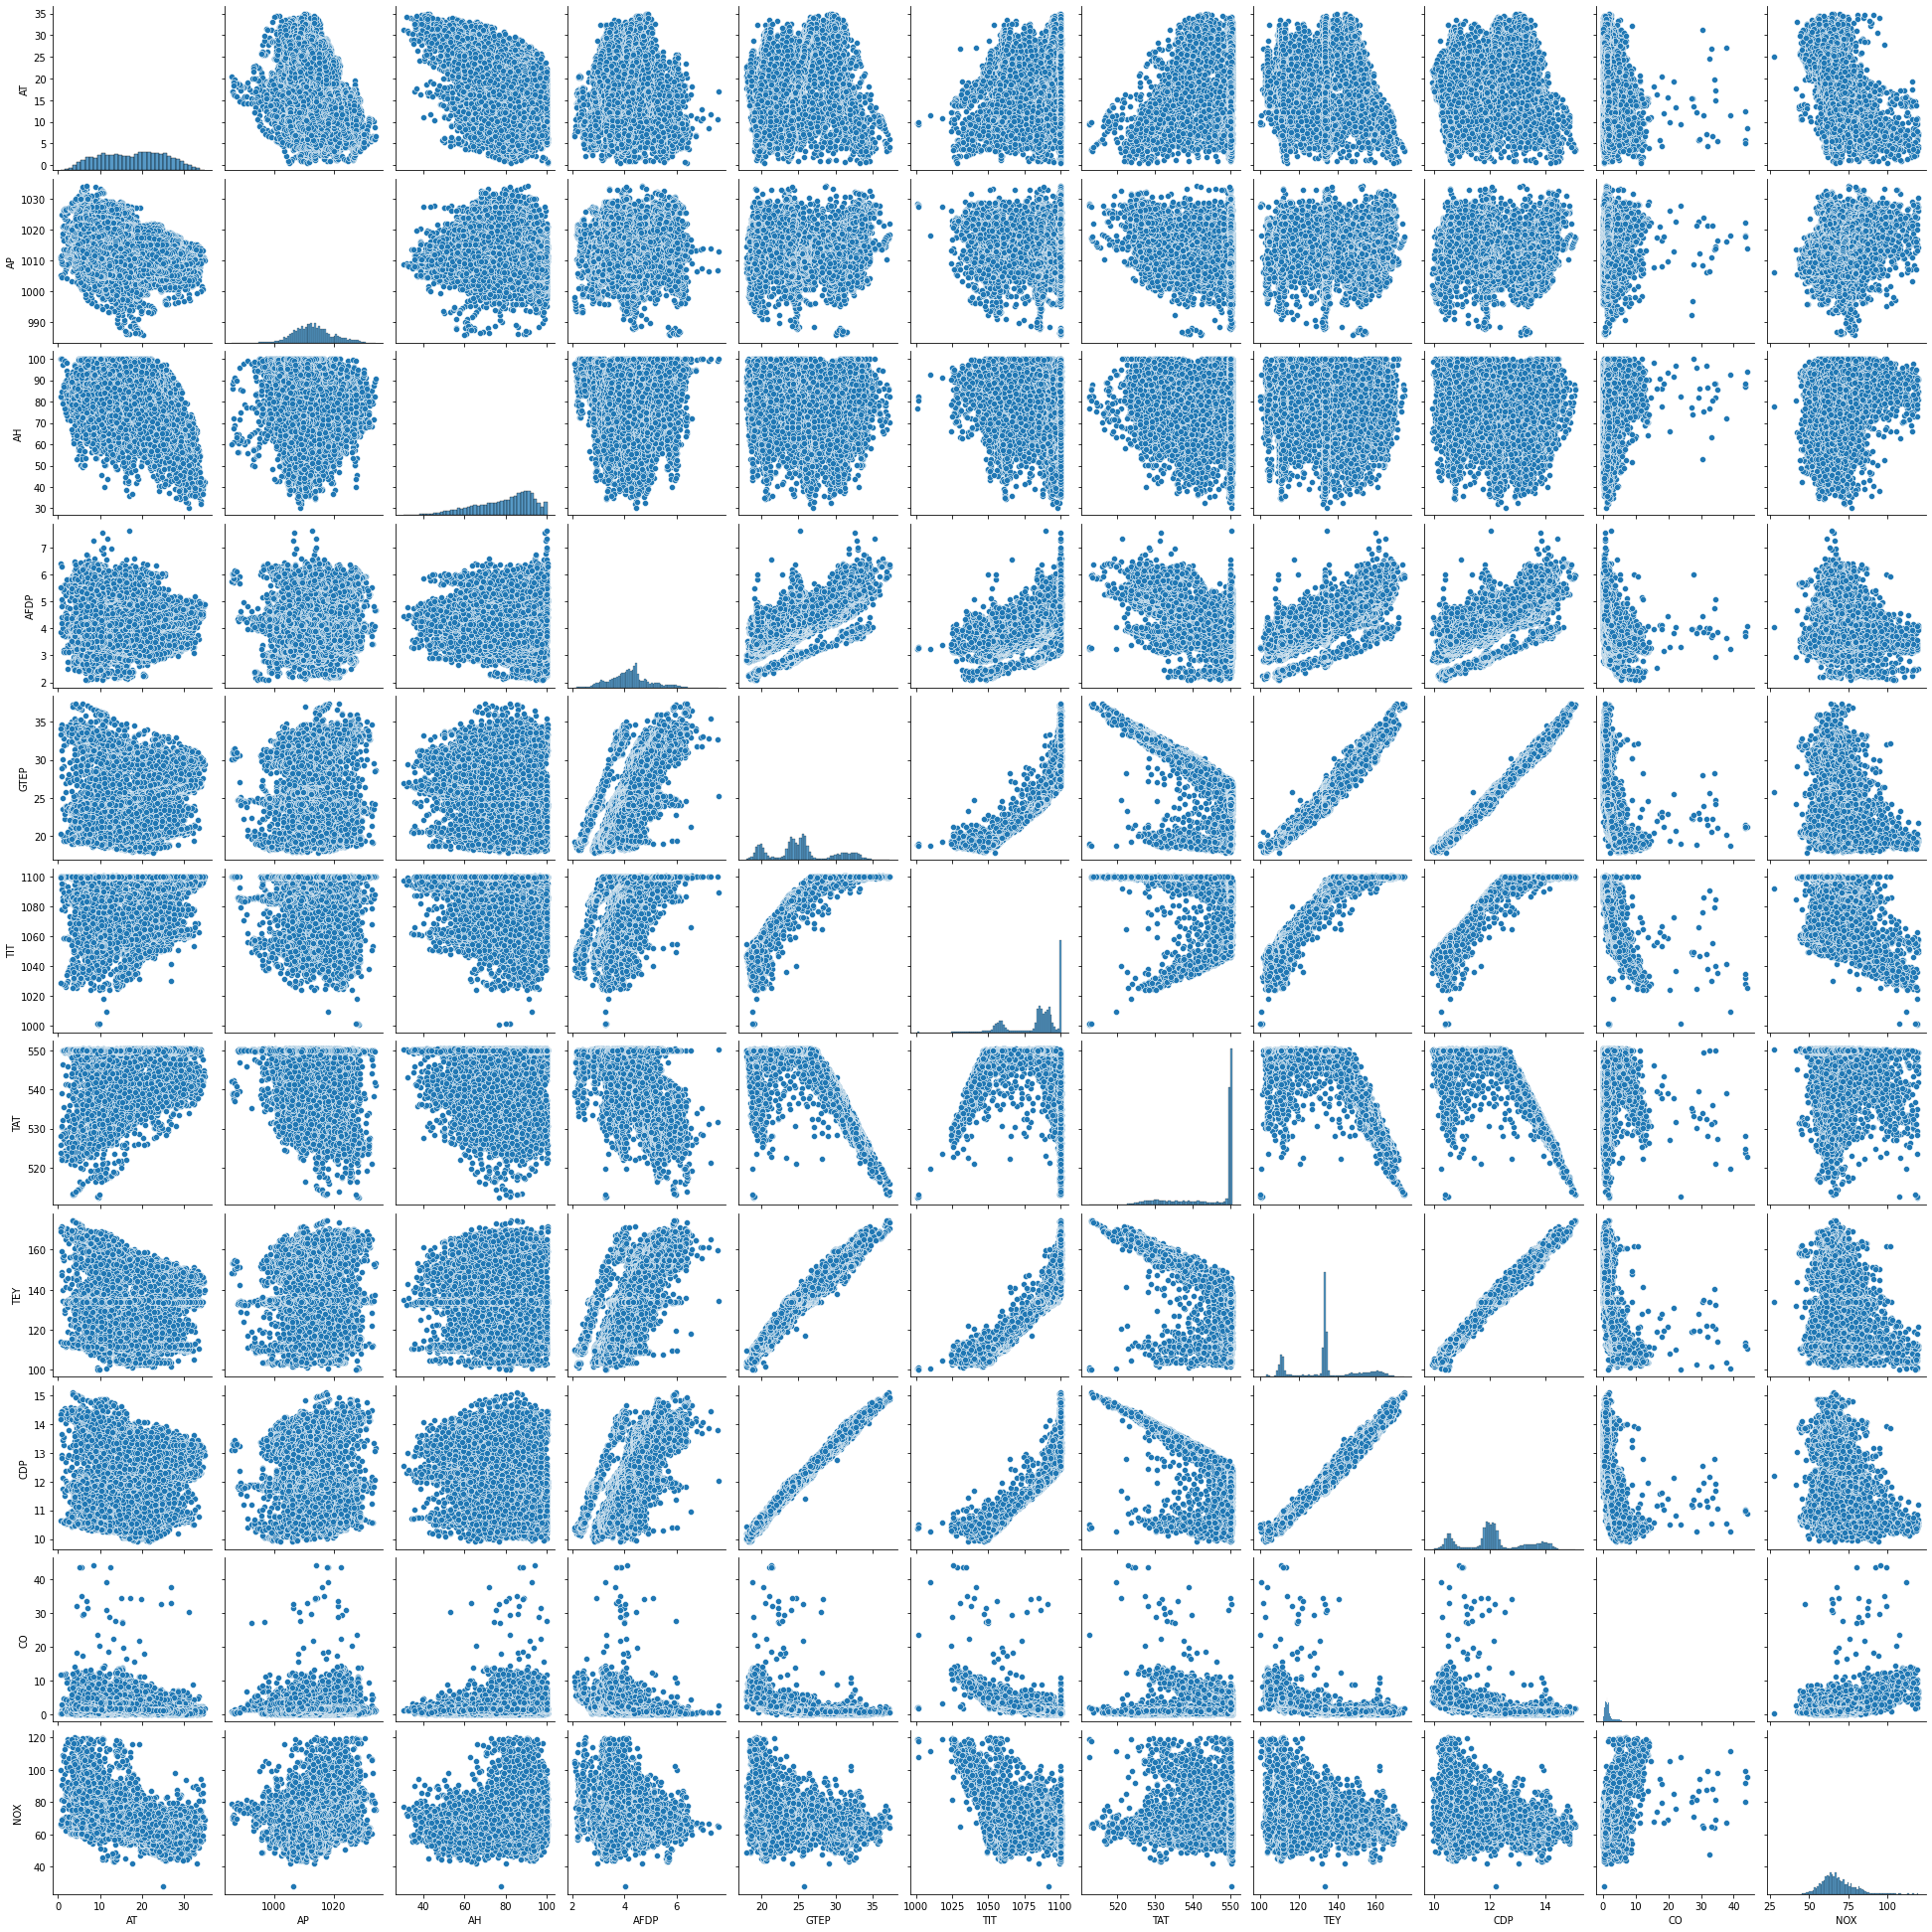

In [50]:
sns.pairplot(turbine)

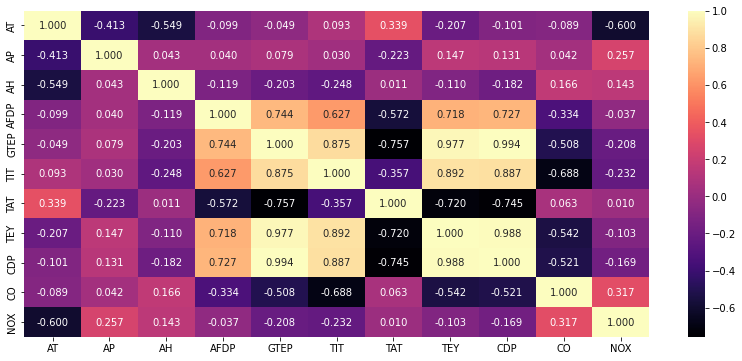

In [51]:
plt.figure(figsize = (14, 6));
sns.heatmap(turbine.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

## Neural Network :

In [52]:
np.random.seed(8)

# split into input (X) and output (Y) variables
X = turbine.drop(['TEY'],axis=1)
Y = turbine['TEY']
X

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [53]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

### 1. Batch Size and Epochs

In [54]:
# create model
model = Sequential()
model.add(Dense(26, input_dim = 10,  activation='relu')) #1st layer
model.add(Dense(26,  activation='tanh')) #2nd layer
model.add(Dense(26, activation='sigmoid')) #3rd layer 
model.add(Dense(26, activation='leaky_relu')) #4th layer or op layer

In [55]:
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_percentage_error'])

In [56]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=20, batch_size=10)

Epoch 1/20
1008/1008 [==============================] - 3s 2ms/step - loss: 14864.4082 - mean_absolute_percentage_error: 88.9717 - val_loss: 10974.2676 - val_mean_absolute_percentage_error: 78.2532
Epoch 2/20
1008/1008 [==============================] - 2s 2ms/step - loss: 9293.8955 - mean_absolute_percentage_error: 69.6521 - val_loss: 6582.5269 - val_mean_absolute_percentage_error: 59.8502
Epoch 3/20
1008/1008 [==============================] - 2s 2ms/step - loss: 5484.4321 - mean_absolute_percentage_error: 52.5765 - val_loss: 3599.5554 - val_mean_absolute_percentage_error: 43.2103
Epoch 4/20
1008/1008 [==============================] - 2s 2ms/step - loss: 2938.7886 - mean_absolute_percentage_error: 37.1619 - val_loss: 1725.0239 - val_mean_absolute_percentage_error: 28.3131
Epoch 5/20
1008/1008 [==============================] - 2s 2ms/step - loss: 1393.4865 - mean_absolute_percentage_error: 23.6443 - val_loss: 713.3219 - val_mean_absolute_percentage_error: 15.8021
Epoch 6/20
1008/100

In [57]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))

470/470 [==============================] - 1s 1ms/step - loss: 251.3563 - mean_absolute_percentage_error: 8.7899
mean_absolute_percentage_error: 8.79%


In [58]:
model.metrics_names

['loss', 'mean_absolute_percentage_error']

In [59]:
scores

[251.35629272460938, 8.789862632751465]

In [60]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

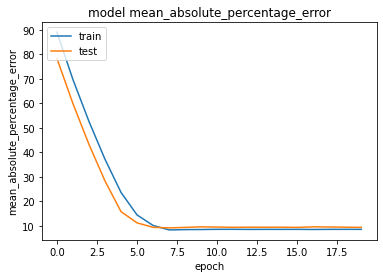

In [61]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model mean_absolute_percentage_error')
plt.ylabel('mean_absolute_percentage_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

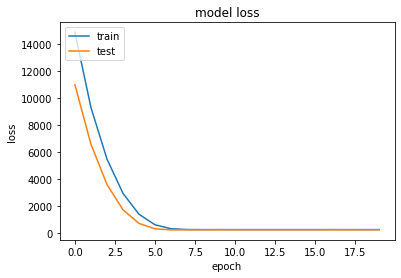

In [62]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()